In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
COUNTRIES = [
    'Belgium',
    'France', 'Germany', 'Netherlands', 'Luxembourg',
    'United Kingdom', 'Spain', 'Italy', 'Portugal',
    'US',
    'China',
    # 'Korea, South', 'Japan', 'Thailand', 'Malaysia',
    # 'Australia', 'Canada', 'Iceland',
    # 'Brazil', 'Argentina'
]

def read_timeseries(filename):
    # 1. Load CSV
    df = pd.read_csv(filename)
    # 2. Get sum by country (aggregate regions)
    res = df.drop(columns=['Lat', 'Long']).groupby('Country/Region').sum().T
    # 3. Clean improper data (spurious zeroes inbetween)
    res = res.diff().clip(0).cumsum()
    # 4. Proper dates
    return res.set_index(pd.to_datetime(res.index))

Text(0.5, 1.0, 'COVID-19 Confirmed cases by countries (log scale)')

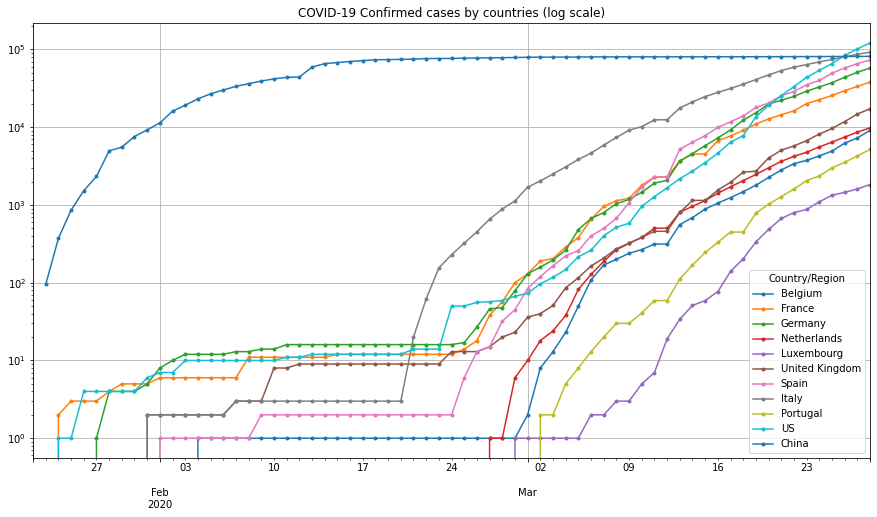

In [3]:
confirmed = read_timeseries("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
confirmed[COUNTRIES].plot(figsize=(15, 8), marker='.', logy=True)
plt.grid()
plt.title('COVID-19 Confirmed cases by countries (log scale)')

Text(0.5, 1.0, 'COVID-19 Deaths by countries (log scale)')

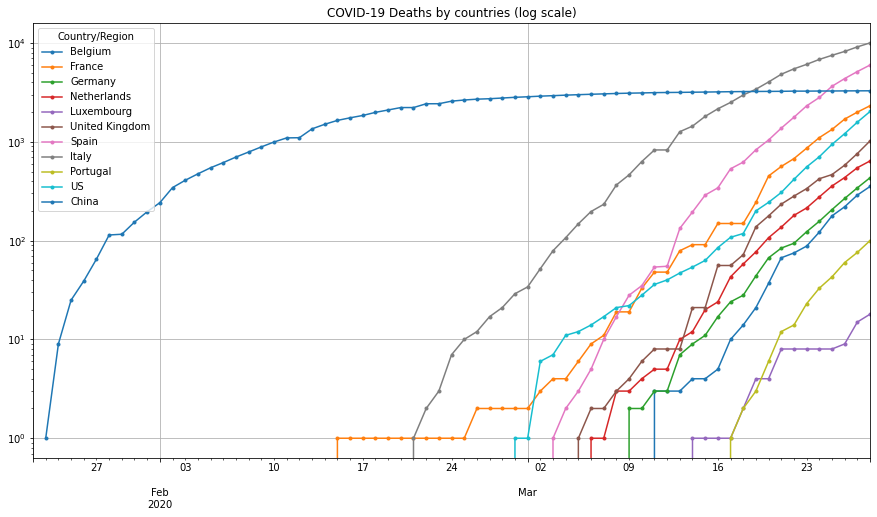

In [4]:
# deaths = read_timeseries("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv")
deaths = read_timeseries("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
deaths[COUNTRIES].plot(figsize=(15, 8), marker='.', logy=True)
plt.grid()
plt.title('COVID-19 Deaths by countries (log scale)')

Text(0.5, 1.0, 'COVID-19 Recoveries by countries (log scale)')

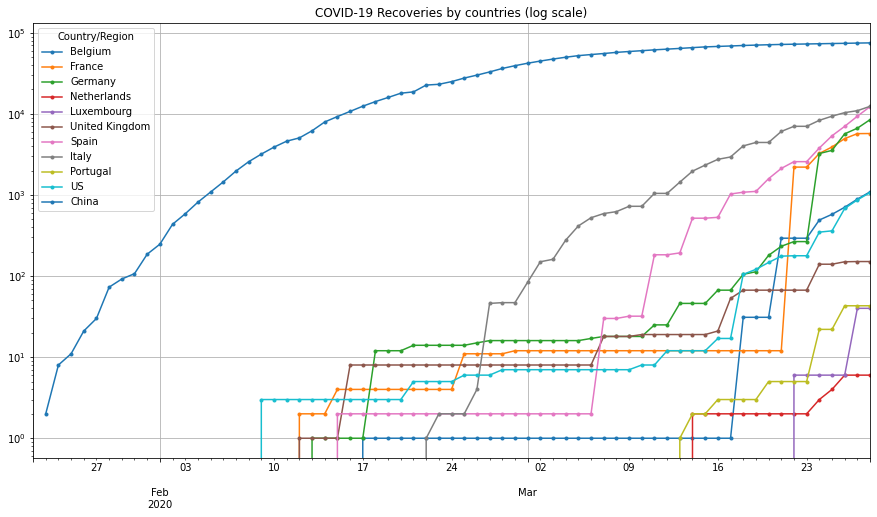

In [5]:
recoveries = read_timeseries("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
recoveries[COUNTRIES].plot(figsize=(15, 8), marker='.', logy=True)
plt.grid()
plt.title('COVID-19 Recoveries by countries (log scale)')

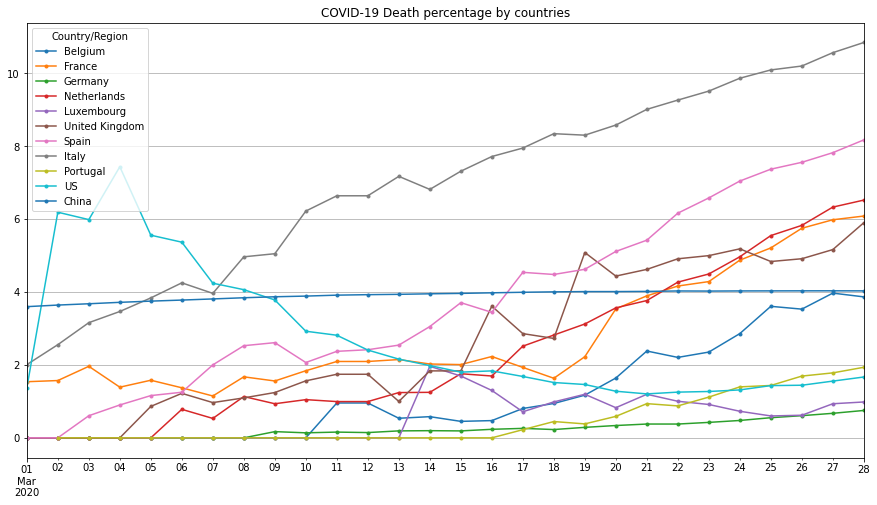

In [6]:
(100 * deaths / confirmed).loc['3/1/20':,COUNTRIES].plot(figsize=(15, 8), marker='.')
plt.title("COVID-19 Death percentage by countries")
plt.grid()

Text(0.5, 1.0, 'COVID-19 Active cases by countries (log scale)')

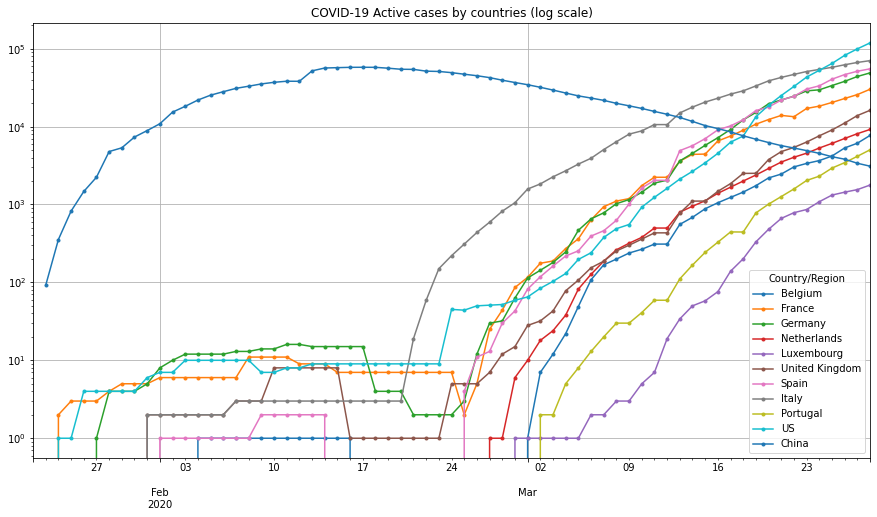

In [7]:
active = confirmed - deaths - recoveries
active[COUNTRIES].plot(figsize=(15, 8), logy=True, marker='.')
plt.grid()
plt.title('COVID-19 Active cases by countries (log scale)')

In [8]:
THRESHOLD_DEATHS = 10
COMPARE_DF = deaths

threshold = COMPARE_DF.apply(lambda x: x>=THRESHOLD_DEATHS)
idx = threshold.index

shift_by_country = {}

for c in threshold.columns:
    try:
        r = list(threshold[c]).index(True)
        shift_by_country[c] = r
    except:
        shift_by_country[c] = len(threshold)

Text(0.5, 1.0, 'Number of COVID-19 deaths (time aligned)')

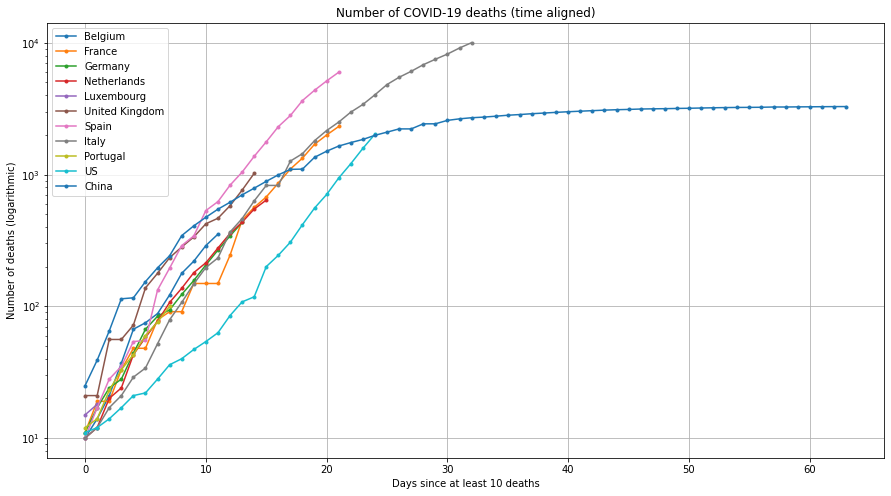

In [9]:
plt.figure(figsize=(15, 8))
for c in COUNTRIES:
    plt.plot(list(COMPARE_DF[c].shift(-shift_by_country[c])), label=c, marker='.')
plt.legend()
plt.yscale('log')
plt.grid()

plt.ylabel('Number of deaths (logarithmic)')
plt.xlabel('Days since at least %d deaths' % THRESHOLD_DEATHS)
plt.title('Number of COVID-19 deaths (time aligned)')